In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('student_exam_data.csv')
df

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0
...,...,...,...
495,4.180170,45.494924,0
496,6.252905,95.038815,1
497,1.699612,48.209118,0
498,9.769553,97.014241,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Study Hours          500 non-null    float64
 1   Previous Exam Score  500 non-null    float64
 2   Pass/Fail            500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [4]:
df.describe

<bound method NDFrame.describe of      Study Hours  Previous Exam Score  Pass/Fail
0       4.370861            81.889703          0
1       9.556429            72.165782          1
2       7.587945            58.571657          0
3       6.387926            88.827701          1
4       2.404168            81.083870          0
..           ...                  ...        ...
495     4.180170            45.494924          0
496     6.252905            95.038815          1
497     1.699612            48.209118          0
498     9.769553            97.014241          1
499     9.875897            66.760346          1

[500 rows x 3 columns]>

In [5]:
df.corr()

,Study Hours,Previous Exam Score,Pass/Fail
Study Hours,1.000000,0.010354,0.583505
Previous Exam Score,0.010354,1.000000,0.443706
Pass/Fail,0.583505,0.443706,1.000000


<AxesSubplot:>

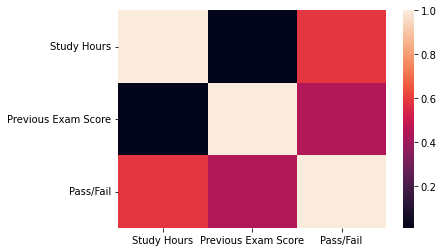

In [6]:
sns.heatmap(df.corr())

In [7]:
df.isnull().sum()

Study Hours            0
Previous Exam Score    0
Pass/Fail              0
dtype: int64

In [8]:
X = df.drop(columns = ['Pass/Fail'])
Y = df['Pass/Fail']

In [9]:
X

,Study Hours,Previous Exam Score
0,4.370861,81.889703
1,9.556429,72.165782
2,7.587945,58.571657
3,6.387926,88.827701
4,2.404168,81.083870
...,...,...
495,4.180170,45.494924
496,6.252905,95.038815
497,1.699612,48.209118
498,9.769553,97.014241


In [10]:
Y

0      0
1      1
2      0
3      1
4      0
      ..
495    0
496    1
497    0
498    1
499    1
Name: Pass/Fail, Length: 500, dtype: int64

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.15)

In [12]:
X_train.shape

(425, 2)

In [13]:
X_test.shape

(75, 2)

In [14]:
Y_train.shape

(425,)

In [15]:
Y_test.shape

(75,)

In [16]:
model_log = LogisticRegression()
model_log.fit(X_train,Y_train)


LogisticRegression()

In [17]:
pred = model_log.predict(X_test)

In [18]:
model_log.score(X_train,Y_train)

0.88

     Study Hours  Pass/Fail
124     3.051416          0
455     5.433626          0
322     6.941776          0
235     7.502069          1
361     6.789594          0
..           ...        ...
70      7.950203          1
104     9.168098          0
56      1.796433          0
267     7.322357          1
405     9.059709          1

[75 rows x 2 columns]


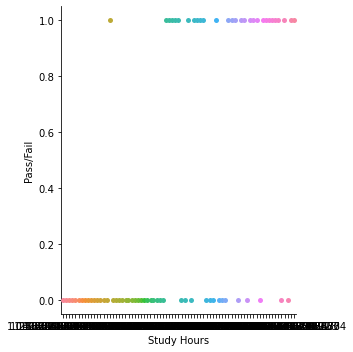

In [19]:
result = pd.DataFrame(columns=['Study Hours','Pass/Fail'])
result['Study Hours'] = X_test['Study Hours']
result['Pass/Fail'] = pred
print(result)
sns.catplot(x ='Study Hours',y='Pass/Fail',data=result)